In [1]:
#Visualizing hundreds of my favourite songs on Spotify.
# A tale of statistics, personal taste and BPMs

#Dimitris Spathis <dispathis@gmail.com>

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('spotify sortyourmusic favorite playlist.csv', sep=';', encoding='cp1252')

In [3]:
df

,#,TITLE,ARTIST,RELEASE,BPM,ENERGY,DANCE,LOUD,VALENCE,LENGTH,ACOUSTIC,POP.
0,1,A Lady Of A Certain Age,The Divine Comedy,27/10/2006,88,51,44,-11,39,5:50,80,12
1,2,Common People - Full Length Version; Album Ver...,Pulp,1/1/2002,146,90,31,-5,49,5:50,1,57
2,3,Disco 2000,Pulp,30/10/1995,133,93,57,-6,54,4:34,1,55
3,4,Death II,Pulp,19/6/1992,124,55,72,-14,93,5:36,2,16
4,5,True Faith - '94,New Order,1/1/1994,118,91,61,-4,97,5:36,2,53
5,6,I Want The World To Stop,Belle & Sebastian,8/10/2010,150,79,59,-7,54,4:34,0,45
6,7,Another Sunny Day,Belle & Sebastian,2006,156,78,40,-5,85,4:04,0,50
7,8,All My Little Words,The Magnetic Fields,1999,106,52,48,-8,41,2:46,75,35
8,9,Where The Dreams Go To Die,John Grant,19/4/2010,115,34,48,-7,12,6:04,73,30
9,10,Queen Of Denmark,John Grant,19/4/2010,100,29,47,-9,38,4:49,77,32


In [4]:
#get the last 4 characters from Date xx/xx/xxxx or xxxx for consistency
df['YEAR'] = df['RELEASE'].str[-4:]

In [5]:
df['YEAR'] = df['YEAR'].convert_objects(convert_numeric=True)


C:\Users\dimitris-saloni\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


In [6]:
# sanity check, we should have 321 samples
#null_data = df[df.isnull().any(axis=1)]
#null_data


In [7]:
df = df.drop('RELEASE', 1)


In [8]:
df

,#,TITLE,ARTIST,BPM,ENERGY,DANCE,LOUD,VALENCE,LENGTH,ACOUSTIC,POP.,YEAR
0,1,A Lady Of A Certain Age,The Divine Comedy,88,51,44,-11,39,5:50,80,12,2006
1,2,Common People - Full Length Version; Album Ver...,Pulp,146,90,31,-5,49,5:50,1,57,2002
2,3,Disco 2000,Pulp,133,93,57,-6,54,4:34,1,55,1995
3,4,Death II,Pulp,124,55,72,-14,93,5:36,2,16,1992
4,5,True Faith - '94,New Order,118,91,61,-4,97,5:36,2,53,1994
5,6,I Want The World To Stop,Belle & Sebastian,150,79,59,-7,54,4:34,0,45,2010
6,7,Another Sunny Day,Belle & Sebastian,156,78,40,-5,85,4:04,0,50,2006
7,8,All My Little Words,The Magnetic Fields,106,52,48,-8,41,2:46,75,35,1999
8,9,Where The Dreams Go To Die,John Grant,115,34,48,-7,12,6:04,73,30,2010
9,10,Queen Of Denmark,John Grant,100,29,47,-9,38,4:49,77,32,2010


In [9]:
#hack because pandas thinks that our minutes are hours
time = pd.DatetimeIndex(df['LENGTH'])
seconds = time.hour * 60 + time.minute

In [10]:
(df['Seconds']) = seconds

In [11]:
df = df.drop('LENGTH', 1)

In [12]:
df.to_csv('spotify cleaned.csv')

In [13]:
df

,#,TITLE,ARTIST,BPM,ENERGY,DANCE,LOUD,VALENCE,ACOUSTIC,POP.,YEAR,Seconds
0,1,A Lady Of A Certain Age,The Divine Comedy,88,51,44,-11,39,80,12,2006,350
1,2,Common People - Full Length Version; Album Ver...,Pulp,146,90,31,-5,49,1,57,2002,350
2,3,Disco 2000,Pulp,133,93,57,-6,54,1,55,1995,274
3,4,Death II,Pulp,124,55,72,-14,93,2,16,1992,336
4,5,True Faith - '94,New Order,118,91,61,-4,97,2,53,1994,336
5,6,I Want The World To Stop,Belle & Sebastian,150,79,59,-7,54,0,45,2010,274
6,7,Another Sunny Day,Belle & Sebastian,156,78,40,-5,85,0,50,2006,244
7,8,All My Little Words,The Magnetic Fields,106,52,48,-8,41,75,35,1999,166
8,9,Where The Dreams Go To Die,John Grant,115,34,48,-7,12,73,30,2010,364
9,10,Queen Of Denmark,John Grant,100,29,47,-9,38,77,32,2010,289


C:\Users\dimitris-saloni\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


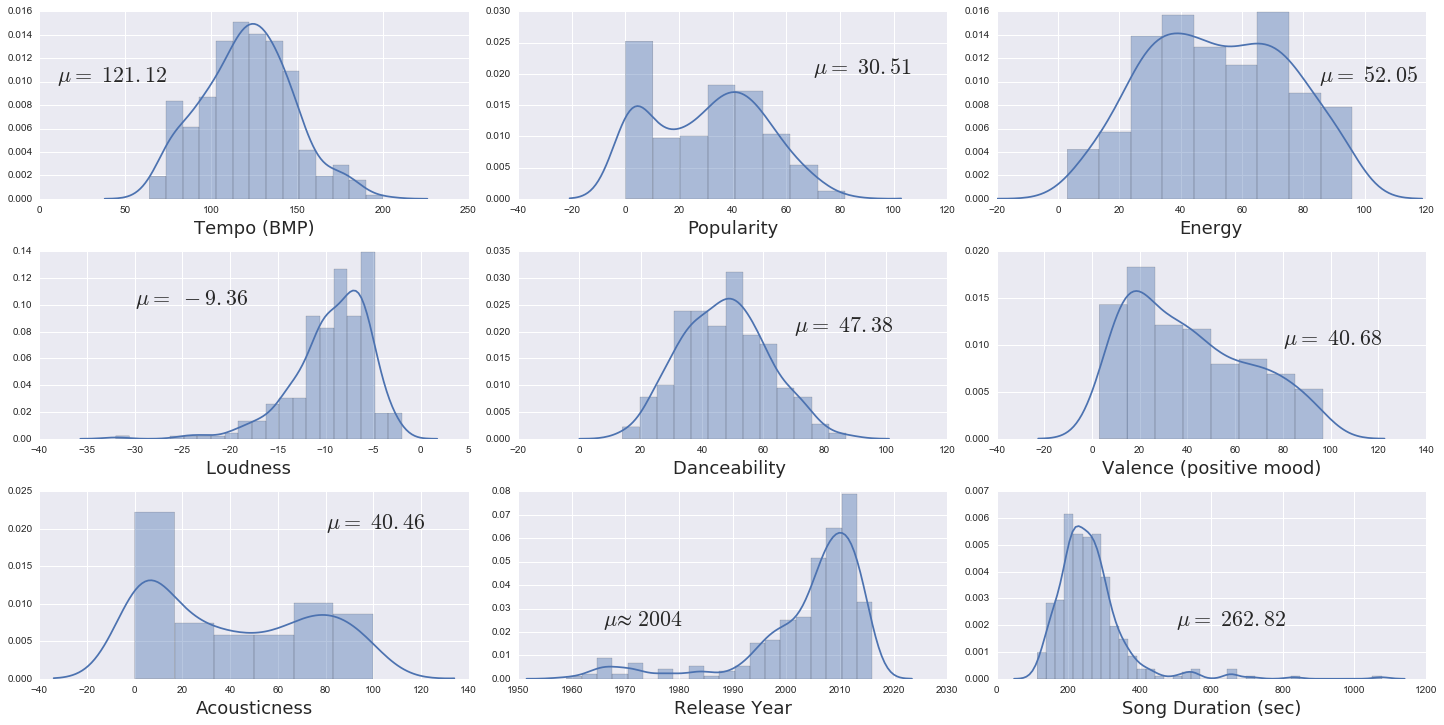

In [222]:

plt.figure(1, figsize=(20, 10),)

hfont = {'fontname':'Proxima Nova'}

plt.subplot(331)
sns.distplot(df.BPM);
plt.text(10, .010, r'$\mu=\ 121.12$', fontsize=22)
plt.xlabel('Tempo (BMP)', fontsize=18, **hfont)
plt.grid(True)

plt.subplot(332)
sns.distplot(df['POP.']);
plt.text(70, .020, r'$\mu=\ 30.51$', fontsize=22)
plt.xlabel('Popularity', fontsize=18, **hfont)
plt.grid(True)

plt.subplot(333)
sns.distplot(df.ENERGY);
plt.text(85, .010, r'$\mu=\ 52.05$', fontsize=22)
plt.xlabel('Energy', fontsize=18, **hfont)
plt.grid(True)

plt.subplot(334)
sns.distplot(df.LOUD);
plt.text(-30, 0.10, r'$\mu=\ -9.36$', fontsize=22)
plt.xlabel('Loudness  ', fontsize=18, **hfont)
plt.grid(True)

plt.subplot(335)
sns.distplot(df.DANCE);
plt.text(70, 0.02, r'$\mu=\ 47.38$', fontsize=22)
plt.xlabel('Danceability ', fontsize=18, **hfont)
plt.grid(True)

plt.subplot(336)
sns.distplot(df.VALENCE);
plt.text(80, 0.01, r'$\mu=\ 40.68$', fontsize=22)
plt.xlabel('Valence (positive mood)', fontsize=18, **hfont)
plt.grid(True)

plt.subplot(337)
sns.distplot(df.ACOUSTIC);
plt.text(80, 0.02, r'$\mu=\ 40.46$', fontsize=22)
plt.xlabel('Acousticness', fontsize=18, **hfont)
plt.grid(True)

plt.subplot(338)
sns.distplot(df.YEAR);
plt.xlabel('Release Year', fontsize=18, **hfont)
plt.grid(True)

plt.subplot(339)
sns.distplot(df.Seconds);
#this corresponds to YEAR above, but somehow Matplot fucked it up when changing it
plt.text(-1100, 0.002, r'$\mu≈\ 2004$', fontsize=22)

#Seconds 
plt.text(500, 0.002, r'$\mu=\ 262.82$', fontsize=22)
plt.xlabel('Song Duration (sec)', fontsize=18, **hfont)
plt.grid(True)

plt.tight_layout(pad=0.5, w_pad=0.6, h_pad=1.0)


In [17]:
df.describe(include = 'all')


,#,TITLE,ARTIST,BPM,ENERGY,DANCE,LOUD,VALENCE,ACOUSTIC,POP.,YEAR,Seconds
count,321.000000,321,321,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000
unique,NaN,321,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Esthimaties,Belle & Sebastian,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,161.000000,NaN,NaN,121.124611,52.059190,47.383178,-9.367601,40.688474,40.464174,30.514019,2003.778816,262.825545
std,92.808944,NaN,NaN,26.169700,22.754936,13.996414,4.088331,25.591676,33.982617,20.781767,11.688308,103.557991
min,1.000000,NaN,NaN,64.000000,3.000000,14.000000,-32.000000,3.000000,0.000000,0.000000,1959.000000,113.000000
25%,81.000000,NaN,NaN,103.000000,34.000000,37.000000,-11.000000,18.000000,6.000000,10.000000,2001.000000,205.000000
50%,161.000000,NaN,NaN,121.000000,51.000000,48.000000,-9.000000,37.000000,35.000000,33.000000,2008.000000,247.000000
75%,241.000000,NaN,NaN,138.000000,71.000000,57.000000,-6.000000,60.000000,73.000000,46.000000,2011.000000,292.000000


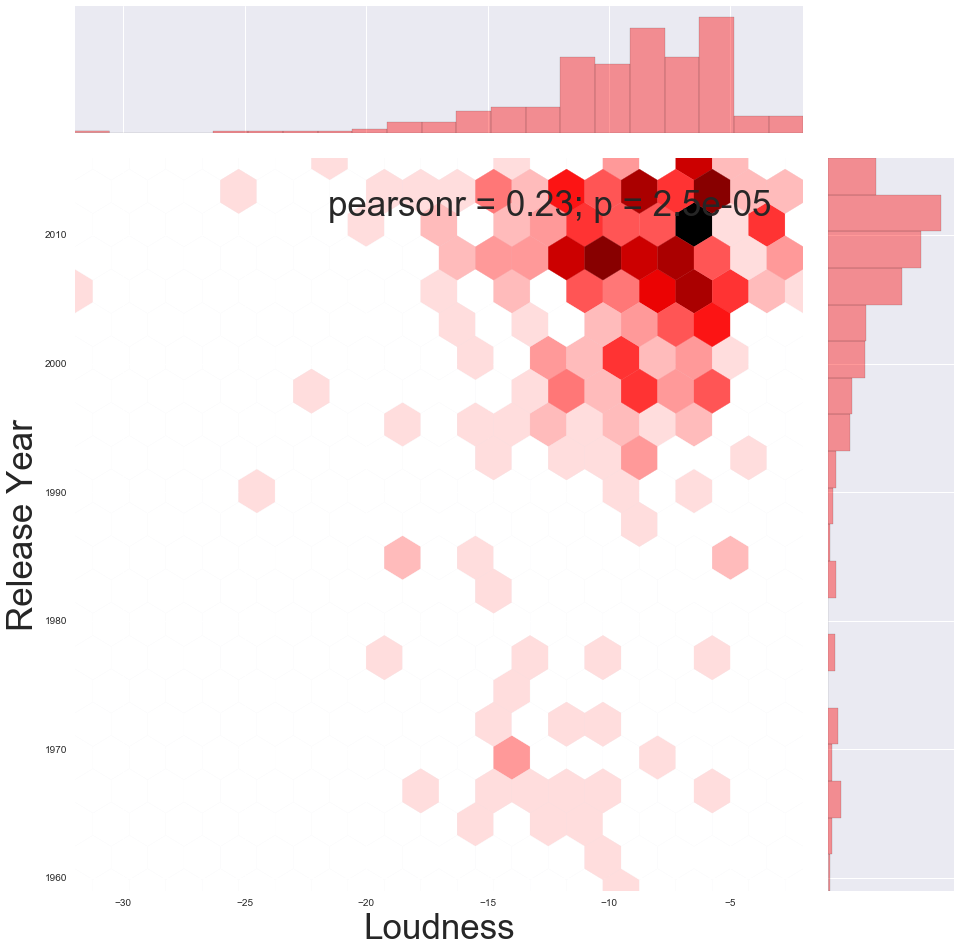

In [160]:
plt.rc("legend", fontsize=35)
#sns.jointplot(y=df['ENERGY'], x=df['LOUD'], kind="hex", color="r", size=13).set_axis_labels("Loudness", "Energy", fontsize=35)
#sns.jointplot(y=df['ENERGY'], x=df['ACOUSTIC'], kind="hex", color="r", size=13).set_axis_labels("Acousticness", "Energy", fontsize=35)
#sns.jointplot(y=df['DANCE'], x=df['VALENCE'], kind="hex", color="r", size=13).set_axis_labels("Valence (positive mood)", "Danceability", fontsize=35)
#sns.jointplot(y=df['ACOUSTIC'], x=df['LOUD'], kind="hex", color="r", size=13).set_axis_labels("Loudness", "Acousticness", fontsize=35)
#sns.jointplot(y=df['ENERGY'], x=df['VALENCE'], kind="hex", color="r", size=13).set_axis_labels("Valence (positive mood)", "Energy", fontsize=35)
#sns.jointplot(y=df['POP.'], x=df['ENERGY'], kind="hex", color="r", size=13).set_axis_labels("Energy", "Popularity", fontsize=35)
sns.jointplot(y=df['YEAR'], x=df['LOUD'], kind="hex", color="r", size=13).set_axis_labels("Loudness", "Release Year", fontsize=35)

In [161]:
df

,#,TITLE,ARTIST,BPM,ENERGY,DANCE,LOUD,VALENCE,ACOUSTIC,POP.,YEAR,Seconds
0,1,A Lady Of A Certain Age,The Divine Comedy,88,51,44,-11,39,80,12,2006,350
1,2,Common People - Full Length Version; Album Ver...,Pulp,146,90,31,-5,49,1,57,2002,350
2,3,Disco 2000,Pulp,133,93,57,-6,54,1,55,1995,274
3,4,Death II,Pulp,124,55,72,-14,93,2,16,1992,336
4,5,True Faith - '94,New Order,118,91,61,-4,97,2,53,1994,336
5,6,I Want The World To Stop,Belle & Sebastian,150,79,59,-7,54,0,45,2010,274
6,7,Another Sunny Day,Belle & Sebastian,156,78,40,-5,85,0,50,2006,244
7,8,All My Little Words,The Magnetic Fields,106,52,48,-8,41,75,35,1999,166
8,9,Where The Dreams Go To Die,John Grant,115,34,48,-7,12,73,30,2010,364
9,10,Queen Of Denmark,John Grant,100,29,47,-9,38,77,32,2010,289


In [162]:
x = df.drop(['#', 'TITLE', 'ARTIST'], axis=1)
#y = df['POP.']
x

,BPM,ENERGY,DANCE,LOUD,VALENCE,ACOUSTIC,POP.,YEAR,Seconds
0,88,51,44,-11,39,80,12,2006,350
1,146,90,31,-5,49,1,57,2002,350
2,133,93,57,-6,54,1,55,1995,274
3,124,55,72,-14,93,2,16,1992,336
4,118,91,61,-4,97,2,53,1994,336
5,150,79,59,-7,54,0,45,2010,274
6,156,78,40,-5,85,0,50,2006,244
7,106,52,48,-8,41,75,35,1999,166
8,115,34,48,-7,12,73,30,2010,364
9,100,29,47,-9,38,77,32,2010,289


In [163]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(x)


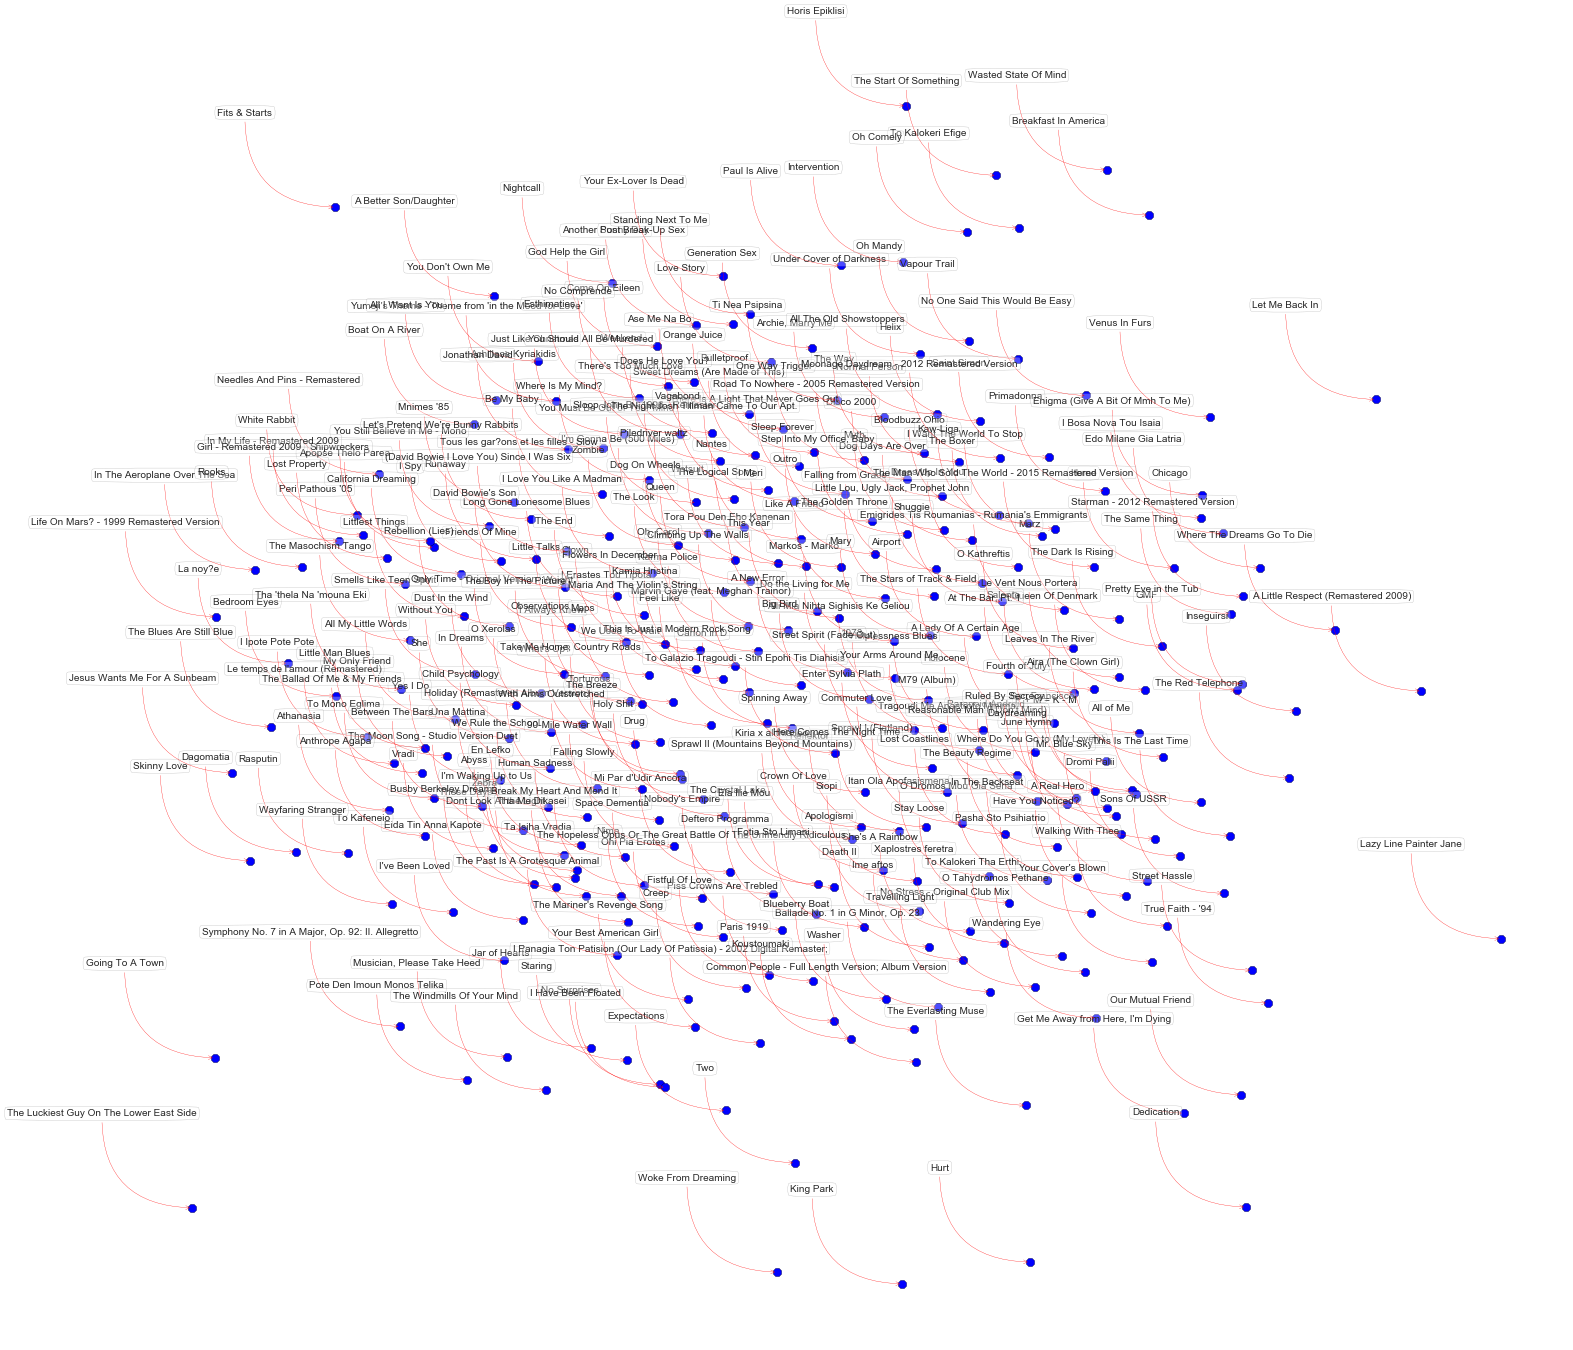

In [256]:
from matplotlib.pyplot import *
fig = figure(figsize=(20, 20))
ax = axes(frameon=False)
setp(ax, xticks=(), yticks=())
subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,
                wspace=0.0, hspace=0.0)
scatter(X_embedded[:, 0], X_embedded[:, 1], s=80,   marker="8")

for row_id in range(0, len(df)):
    #if (df.ARTIST[row_id] in ['The National']):
        target_word = df.TITLE[row_id]
        xx = X_embedded[row_id, 0]
        yy = X_embedded[row_id, 1]
        plt.annotate(target_word, (xx,yy), size=10, xytext=(-90,90), 
            textcoords='offset points', ha='center', va='bottom',
            bbox=dict(boxstyle='round4', fc='white', alpha=0.3),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', 
                            color='red'))



In [220]:
#df.to_pickle('spotify_dataframe.pkl')

In [78]:
x.corr()
# ENERGY LOUD 0.75
# ENERGY ACOUSTIC -0.72
# DANCE VALENCE 0.58
# ACOUSTIC LOUD -0.52
# ENERGY VALENCE 0.46
# POP ENERGY 0.25
# YEAR LOUD 0.23

,BPM,ENERGY,DANCE,LOUD,VALENCE,ACOUSTIC,POP.,YEAR,Seconds
BPM,1.000000,0.192487,-0.053181,0.121965,0.126346,-0.130756,-0.033187,0.104533,0.006352
ENERGY,0.192487,1.000000,0.180430,0.752951,0.462436,-0.724485,0.252546,0.098558,0.040596
DANCE,-0.053181,0.180430,1.000000,0.129333,0.582538,-0.059178,0.173851,-0.086395,-0.119176
LOUD,0.121965,0.752951,0.129333,1.000000,0.276973,-0.529625,0.219275,0.232673,-0.022037
VALENCE,0.126346,0.462436,0.582538,0.276973,1.000000,-0.233876,0.164020,-0.143525,-0.217452
ACOUSTIC,-0.130756,-0.724485,-0.059178,-0.529625,-0.233876,1.000000,-0.249505,-0.077354,-0.092299
POP.,-0.033187,0.252546,0.173851,0.219275,0.164020,-0.249505,1.000000,-0.095260,0.020343
YEAR,0.104533,0.098558,-0.086395,0.232673,-0.143525,-0.077354,-0.095260,1.000000,0.054275
Seconds,0.006352,0.040596,-0.119176,-0.022037,-0.217452,-0.092299,0.020343,0.054275,1.000000


In [257]:
x

,BPM,ENERGY,DANCE,LOUD,VALENCE,ACOUSTIC,POP.,YEAR,Seconds
0,88,51,44,-11,39,80,12,2006,350
1,146,90,31,-5,49,1,57,2002,350
2,133,93,57,-6,54,1,55,1995,274
3,124,55,72,-14,93,2,16,1992,336
4,118,91,61,-4,97,2,53,1994,336
5,150,79,59,-7,54,0,45,2010,274
6,156,78,40,-5,85,0,50,2006,244
7,106,52,48,-8,41,75,35,1999,166
8,115,34,48,-7,12,73,30,2010,364
9,100,29,47,-9,38,77,32,2010,289


In [258]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(x)


PCA(copy=True, n_components=2, whiten=False)

In [259]:
print(pca.explained_variance_ratio_) 


[ 0.74199442  0.11549473]


In [260]:
x_pca = pca.fit_transform(x)

In [358]:
from sklearn import svm
clf = svm.OneClassSVM(kernel="rbf", gamma=0.001, nu=0.3)
clf.fit(x_pca)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.001, kernel='rbf',
      max_iter=-1, nu=0.3, random_state=None, shrinking=True, tol=0.001,
      verbose=False)

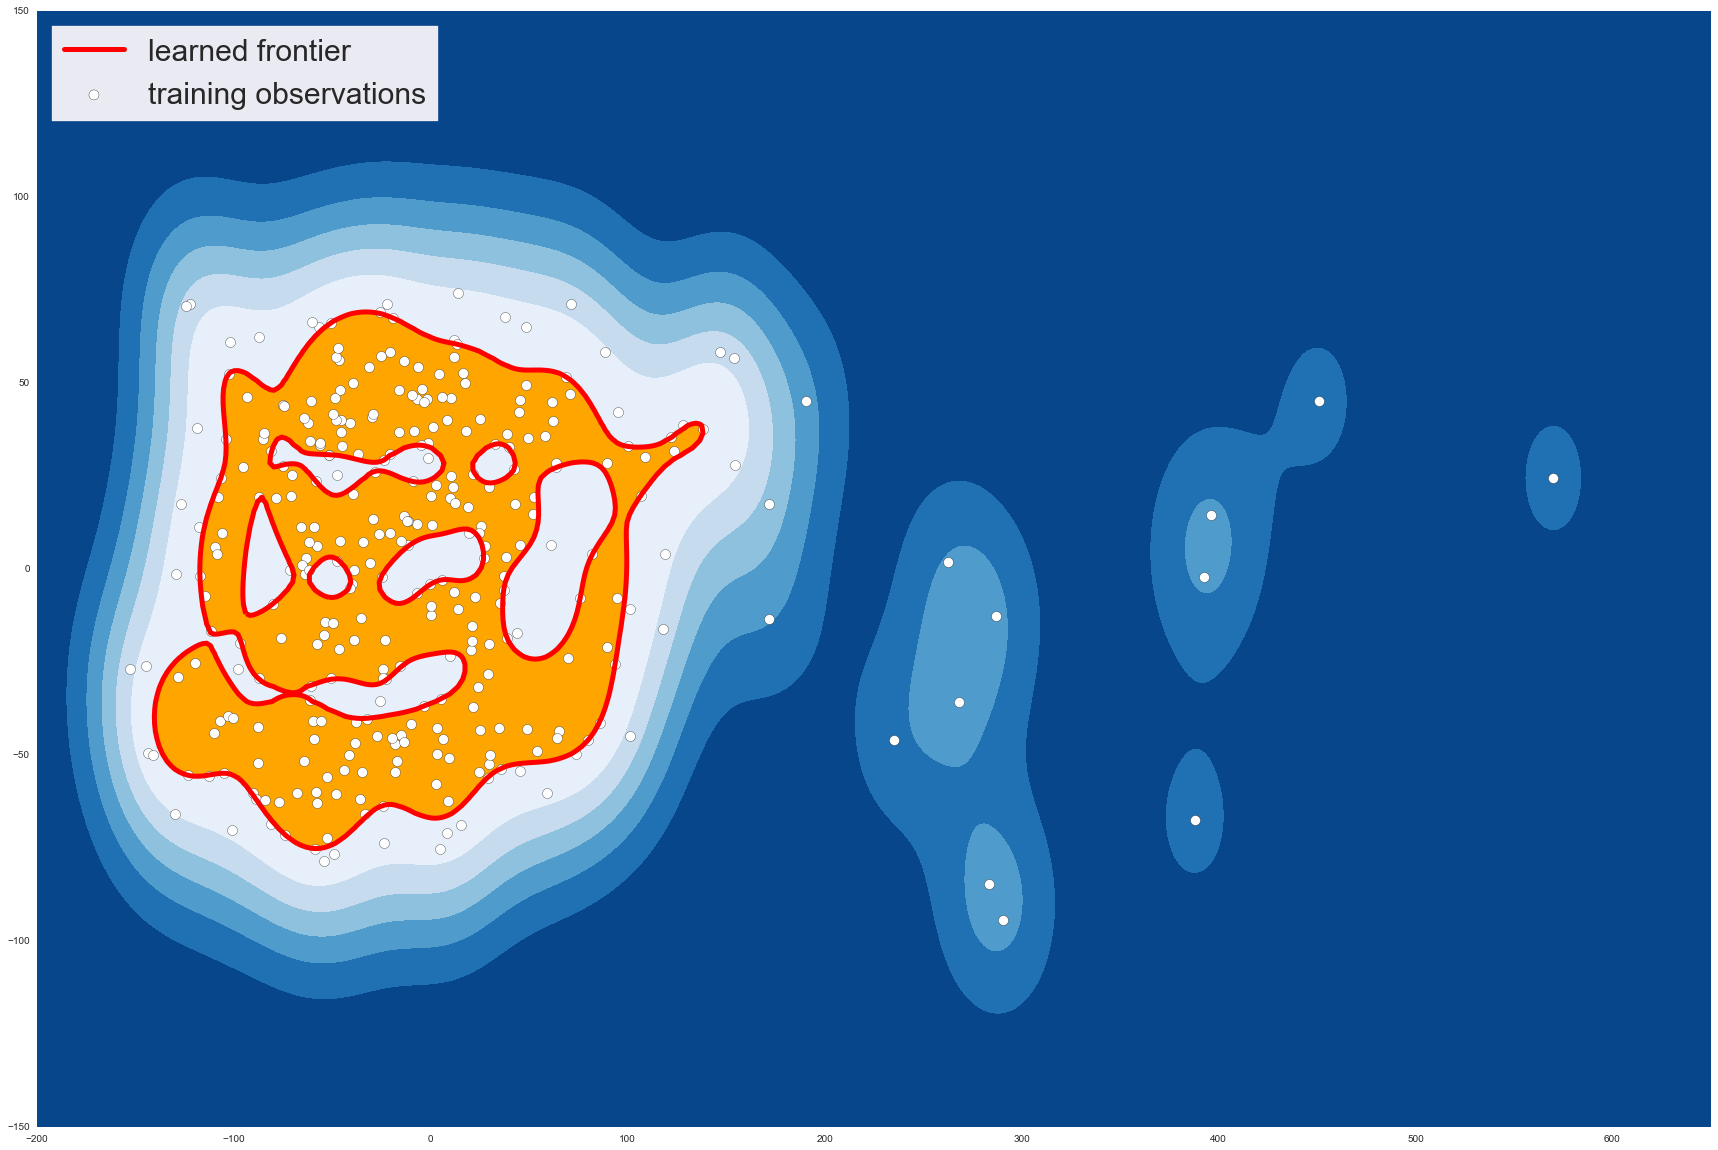

In [361]:
xx, yy = np.meshgrid(np.linspace(-200, 800, 500), np.linspace(-200,800, 500))

Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(30, 20),)
#plt.title("Novelty Detection")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.Blues_r)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=5, colors='red')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='orange')

#visualize song titles
'''
for row_id in range(0, len(df)):
    #if (df.ARTIST[row_id] in ['The National']):
        target_word = df.TITLE[row_id]
        xxx = x_pca[row_id, 0]
        yyy = x_pca[row_id, 1]
        plt.annotate(target_word, (xxx,yyy), size=10, xytext=(-90,90), 
            textcoords='offset points', ha='center', va='bottom',
            bbox=dict(boxstyle='round4', fc='white', alpha=0.3),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', 
                            color='red'))
'''   

b1 = plt.scatter(x_pca[:, 0], x_pca[:, 1], c='white', s=100)
plt.axis('tight')
plt.xlim((-200, 650))
plt.ylim((-150, 150))

leg = plt.legend([a.collections[0], b1, ],
           ["learned frontier", "training observations"],
           loc="upper left",prop={'size':30}, frameon=True)

plt.show()

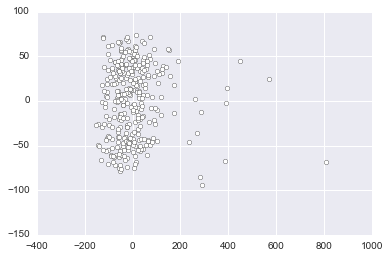

In [271]:
plt.scatter(x_pca[:, 0], x_pca[:, 1], c='white')